<a href="https://colab.research.google.com/github/joyboy129/federated/blob/main/Second_scenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@test {"skip": true}

!pip install --quiet --upgrade tensorflow-federated
import nest_asyncio
nest_asyncio.apply()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
%load_ext tensorboard

In [ ]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import MinMaxScaler


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/first_file.csv", sep=',', encoding='latin-1')
df.head()

,Alloy,Longue Phase,A,delta,TM,DELTA_TM,ElectronÃ©gativitÃ©,Delta_Electro-,SID,VEC,...,Pr,N,Tb,Sc,Tm,Lu,Ir,Os,As,Tc
0,Ag2Al,L,1.800000,2.220446e-16,1133.900000,0.125033,1.823333,0.150849,5.291979,1.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ag5Cd8,L,1.738462,2.798476e-02,840.414615,0.370383,1.782308,0.116761,5.539439,1.615385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ag2Ga3,L,1.800000,1.110223e-16,675.406000,0.675464,1.858000,0.058788,5.595419,2.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ag3Ga,L,1.800000,0.000000e+00,1001.340000,0.402699,1.900000,0.051962,4.675254,1.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AgMg3,L,1.725000,2.510219e-02,1000.900000,0.134546,1.465000,0.268468,4.675254,1.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(3638, 75)

In [ ]:
df.dtypes
# df=df.iloc[:50000]
# Run for small data
df.rename(columns={"ElectronÃ©gativitÃ©": "Electronégativité"}, inplace=True)

df.columns
df.drop(['Alloy', 'Longue Phase', 'Ag', 'Al', 'Cd', 'Ga', 'Mg', 'Pt', 'Sb',
       'Sn', 'Ti', 'Zn', 'Zr', 'B', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Er', 'Fe',
       'In', 'La', 'Li', 'Mn', 'Mo', 'Nd', 'Ni', 'Re', 'Ru', 'Sm', 'V', 'Yb',
       'Au', 'Be', 'Bi', 'Pb', 'Nb', 'Si', 'Dy', 'Ge', 'Hf', 'W', 'Pd', 'Sr',
       'Na', 'Y', 'Ta', 'Gd', 'Rh', 'P', 'C', 'Ho', 'Pr', 'N', 'Tb', 'Sc',
       'Tm', 'Lu', 'Ir', 'Os', 'As', 'Tc'], axis=1, inplace=True)


In [ ]:
df.shape

(3638, 12)

In [ ]:
# client1 = 25
# client2 = 25
# client3 = 25
# client4 = 25
df["Etat d'entropie"] = df["Etat d'entropie"].map({'H': 1, 'L': 0})
df["Etat d'entropie"].value_counts()

1    1957
0    1681
Name: Etat d'entropie, dtype: int64

In [ ]:
column_names=list(df.columns)
print(column_names)

['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K', "Etat d'entropie"]


In [ ]:
# import random
# client1 = int((client1/100) *df.shape[0])
# client2 = int((client2/100) *df.shape[0])
# client3 = int((client3/100) *df.shape[0])
# client4 = df.shape[0] - client1 - client2 - client3
# my_list = [1] * client1 + [2] * client2 + [3] * client3 + [4] * client4
# random.shuffle(my_list)
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

client_distributions = {
    1: {'percentage': 0.35, 'distribution': [0.3, 0.7]},
    2: {'percentage': 0.35, 'distribution': [0.35, 0.65]},
    3: {'percentage': 0.25, 'distribution': [0.55, 0.45]},
    4: {'percentage': 0.05, 'distribution': [0.5, 0.5]},
}
def distribute_dataframe(df, client_distributions):
    np.random.seed(42)

    # Separate the dataframe into 0s and 1s
    df0 = df[df['Etat d\'entropie'] == 0]
    df1 = df[df['Etat d\'entropie'] == 1]

    # Perform undersampling
    # if len(df0) > len(df1):
    #     df0 = df0.sample(len(df1))
    # else:
    #     df1 = df1.sample(len(df0))

    # Combine back to a single dataframe

    distributed_df = pd.DataFrame()

    for client_id, client_info in client_distributions.items():
        client_percentage = client_info['percentage']
        class_distribution = client_info['distribution']

        # Calculate the exact number of rows for this client
        n_rows = int(client_percentage * len(df))

        # Calculate desired number of samples for each class
        n0 = int(class_distribution[0] * n_rows)
        n1 = n_rows - n0

        # Check if there are enough samples for each class
        if n0 > len(df0):
            n0 = len(df0)
        if n1 > len(df1):
            n1 = len(df1)

        # Sample the rows for this client
        tmp_df0 = df0.sample(n=n0, random_state=42)
        tmp_df1 = df1.sample(n=n1, random_state=42)

        # Drop these rows from the original dataframes
        df0 = df0.drop(tmp_df0.index)
        df1 = df1.drop(tmp_df1.index)

        # Add the client id and combine the samples
        tmp_df = pd.concat([tmp_df0, tmp_df1])
        tmp_df['id'] = client_id

        distributed_df = pd.concat([distributed_df, tmp_df])


    return distributed_df

df =distribute_dataframe(df, client_distributions)
# Create a copy of the data excluding the specified column

# Prepare the 'id' column
# ids = np.random.choice([1,2,3,4], size=len(df), p=list(id_percentages.values()))
# df['id'] = ids

# # Prepare the "Etat d'entropie" column
# for id_val, percentages in entropy_percentages.items():
#     size = len(df[df['id'] == id_val])
#     entropy_values = np.random.choice([0,1], size=size, p=list(percentages.values()))
#     df.loc[df['id'] == id_val, 'Etat d\'entropie'] = entropy_values
df.head()

,A,delta,TM,DELTA_TM,Electronégativité,Delta_Electro-,SID,VEC,Delta VEC,K,Delta K,Etat d'entropie,id
3394,2.066667,0.060349,2508.150000,0.214545,1.496667,0.134743,9.133863,5.000000,0.816497,120.000000,86.409876,0,1
897,1.737000,0.076008,1663.191250,0.203819,1.781300,0.144552,13.919003,7.360000,2.738686,151.140000,40.567726,0,1
204,1.500000,0.167774,1974.372222,0.225639,1.902778,0.227127,6.881815,7.222222,3.488960,217.611111,81.208332,0,1
49,1.833333,0.025713,1463.316667,0.512135,1.806667,0.278129,5.291979,4.666667,2.357023,124.000000,67.882251,0,1
1873,1.975000,0.065774,2414.900000,0.271512,1.577500,0.059319,11.525651,5.750000,0.829156,162.500000,28.613808,0,1


In [ ]:
df.shape

(3372, 13)

In [ ]:

def normalize_columns(df, columns_to_normalize):
    # Create a copy of the original dataframe
    normalized_df = df.copy()

    # Select the columns to normalize
    data_to_normalize = normalized_df[columns_to_normalize]

    # Create an instance of the scaler
    scaler = StandardScaler()

    # Fit the scaler to the selected columns
    scaler.fit(data_to_normalize)

    # Normalize the selected columns
    normalized_data = scaler.transform(data_to_normalize)

    # Update the normalized values in the dataframe
    normalized_df[columns_to_normalize] = normalized_data

    return normalized_df
df1=normalize_columns(df,['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])
df1.head()

,A,delta,TM,DELTA_TM,Electronégativité,Delta_Electro-,SID,VEC,Delta VEC,K,Delta K,Etat d'entropie,id
3394,1.547141,-0.090370,0.925264,-0.062021,-1.584977,-0.657650,-0.740944,-0.372989,-1.039580,-1.032744,0.863136,0,1
897,-0.906213,0.354744,-0.864405,-0.184413,-0.274023,-0.556443,1.170228,1.097351,0.508267,-0.400203,-0.567605,0,1
204,-2.669948,2.963219,-0.205306,0.064556,0.285475,0.295506,-1.640406,1.011512,1.112427,0.950013,0.700795,0,1
49,-0.189308,-1.074921,-1.287750,3.333421,-0.157190,0.821702,-2.275383,-0.580664,0.200932,-0.951492,0.284886,0,1
1873,0.864964,0.063831,0.727755,0.587955,-1.212678,-1.435815,0.214330,0.094280,-1.029386,-0.169449,-0.940689,0,1


In [ ]:
# Run for Bigdata only
NUM_CLIENTS = 5

data = pd.read_csv("/content/drive/MyDrive/BigData.csv", sep=',', encoding='latin-1')

data.rename(columns={"ElectronÃ©gativitÃ©": "Electronégativité"}, inplace=True)
data.drop("Unnamed: 0", axis=1, inplace=True)
data=normalize_columns(data,['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])
group_proportions = data["Etat d'entropie"].value_counts(normalize=True)

# Step 2: Determine the size of the final dataset after sampling (let's say you want 70% of the original size)
desired_sample_size = 6000

# Step 3: Calculate the required sample size for each group based on their proportions
sample_size_group_0 = int(group_proportions.loc[0] * desired_sample_size)
sample_size_group_1 = int(group_proportions.loc[1] * desired_sample_size)

# Step 4: Separate the DataFrame into two groups based on the values of "Etat d'entropie"
grouped_data = data.groupby("Etat d'entropie")

# Step 5: Sample the rows from each group with the calculated sample sizes
sampled_data = grouped_data.apply(lambda x: x.sample(n=sample_size_group_0) if x["Etat d'entropie"].iloc[0] == 0 else x.sample(n=sample_size_group_1))

# Step 6: Concatenate the sampled groups back into a single DataFrame
sampled_data = sampled_data.reset_index(drop=True)

sampled_data["id"]=NUM_CLIENTS


# minority_count = data["Etat d'entropie"].sum()
# majority_count = data.shape[0] - minority_count

# # Calculate the difference in counts between the classes
# count_diff = majority_count - minority_count

# # If the difference is positive, we need to add more samples of the minority class (1)
# # If the difference is negative, we need to remove samples of the majority class (0)

# if count_diff > 0:
#     # Get the indices of the rows with target value 1
#     minority_indices = data[data['Etat d\'entropie'] == 1].index
#     # Sample rows with replacement from the minority class to match the majority class count
#     additional_minority_indices = np.random.choice(minority_indices, count_diff, replace=True)
#     # Concatenate the additional samples with the original DataFrame
#     data = pd.concat([data, data.loc[additional_minority_indices]])
# elif count_diff < 0:
#     # Get the indices of the rows with target value 0
#     majority_indices = data[data["Etat d'entropie"] == 0].index
#     # Randomly select rows from the majority class to remove to match the minority class count
#     majority_indices_to_remove = np.random.choice(majority_indices, abs(count_diff), replace=False)
#     # Drop the selected rows from the majority class
#     data = data.drop(majority_indices_to_remove)
df = pd.concat([df1, sampled_data], ignore_index=True)



In [ ]:
for id in range(1,NUM_CLIENTS+1):
  df[df["id"]==id].drop_duplicates(subset=['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])


# df=df.drop_duplicates(subset=['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])

In [ ]:
df.columns

Index(['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-',
       'SID', 'VEC', 'Delta VEC', 'K', 'Delta K', 'Etat d'entropie', 'id'],
      dtype='object')

In [ ]:
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt


def pair_plot(df):
  etat_entropie_values = [0, 1]

# Plotting the density plots
  id_values = range(1,NUM_CLIENTS+1)

# Plotting the density plots
  num_rows = 11
  num_cols = NUM_CLIENTS
  num_plots = num_rows * num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 36))
  axes = axes.flatten()

  for i, col in enumerate(df.columns):
    if col != 'id' and col != 'Etat d\'entropie':
        for j, id_value in enumerate(id_values):
            ax = axes[(i * len(id_values)) + j]
            for etat_entropie in [0, 1]:
                filtered_data = df[df['Etat d\'entropie'] == etat_entropie]
                if not filtered_data.empty:
                    filtered_data[col].plot(kind='density', label=f'Etat Entropie = {etat_entropie}', ax=ax)
            filtered_data = df[(df['Etat d\'entropie'] == 0) | (df['Etat d\'entropie'] == 1)]
            if not filtered_data.empty:
                filtered_data[col].plot(kind='density', label='All Data', ax=ax, linestyle='--')
            ax.set_title(f'Density Plot - {col}, id = {id_value}')
            ax.legend()

  plt.tight_layout()
  plt.show()
# pair_plot(df)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
import nest_asyncio
nest_asyncio.apply()
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import collections
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
np.random.seed(0)
tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [ ]:
df.dtypes

A                    float64
delta                float64
TM                   float64
DELTA_TM             float64
Electronégativité    float64
Delta_Electro-       float64
SID                  float64
VEC                  float64
Delta VEC            float64
K                    float64
Delta K              float64
Etat d'entropie        int64
id                     int64
dtype: object

In [ ]:
# split client id into train and test clients
client_id_colname = 'id' # the column that represents client ID
client_ids = df[client_id_colname].unique()
train_client_ids = range(1,NUM_CLIENTS)
test_client_ids = [NUM_CLIENTS]
print(client_ids)

[1 2 3 4 5]


In [ ]:
def create_tf_dataset_for_client_fn(client_id):
  # a function which takes a client_id and returns a
  # tf.data.Dataset for that client
    client_data = df[df[client_id_colname] == client_id]
    client_data = client_data.drop(columns=["id"])
    dataset = tf.data.Dataset.from_tensor_slices(client_data.to_dict('list'))
    dataset = dataset.shuffle(SHUFFLE_BUFFER).batch(1).repeat(NUM_EPOCHS)
    return dataset

In [ ]:
NUM_EPOCHS =10
BATCH_SIZE = 512
SHUFFLE_BUFFER = 2000
PREFETCH_BUFFER = 1000



train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=train_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

#
test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=test_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

In [ ]:
train_data.element_type_structure

{'A': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'delta': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'TM': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'DELTA_TM': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Electronégativité': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Delta_Electro-': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'SID': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'VEC': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Delta VEC': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'K': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Delta K': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 "Etat d'entropie": TensorSpec(shape=(None,), dtype=tf.int32, name=None)}

In [ ]:
example_dataset = train_data.create_tf_dataset_for_client(
    train_data.client_ids[0])

example_element = next(iter(example_dataset))


In [ ]:

def preprocess(dataset):

        def batch_format_fn(element):
            output = tf.concat([
                tf.expand_dims(element['Electronégativité'],1)
                ,tf.expand_dims(element['Delta_Electro-'],1)
                ,tf.expand_dims(element['SID'],1)
                ,tf.expand_dims(element['VEC'],1)
                ,tf.expand_dims(element['Delta VEC'],1)
                ,tf.expand_dims(element[ 'K'],1)
                ,tf.expand_dims(element['Delta K'],1)
                ,tf.expand_dims(element['A'],1)
                ,tf.expand_dims(element['delta'],1)
                ,tf.expand_dims(element['TM'],1)
                ,tf.expand_dims(element['DELTA_TM'],1)], axis=1)
            return collections.OrderedDict(x= tf.reshape(output, [1, 11] )
                                           ,
                                           y= tf.reshape(element["Etat d'entropie"], [1,1]) )

        return dataset.map(batch_format_fn)

In [ ]:

preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

OrderedDict([('x',
              array([[-1.1735287 , -1.6868681 ,  0.9552979 , -0.49759415, -0.6287776 ,
                      -0.8864915 , -0.76373607,  0.45565882, -0.07929099, -0.44670582,
                       1.2265136 ]], dtype=float32)),
             ('y', array([[0]], dtype=int32))])

In [ ]:
def make_federated_data(client_data, client_ids):
    return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [ ]:
sample_clients = train_data.client_ids[0:NUM_CLIENTS]
# sample_clients_test=test_data.client_ids[0:NUM_CLIENTS]
federated_train_data = make_federated_data(train_data, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

Number of client datasets: 4
First dataset: <_MapDataset element_spec=OrderedDict([('x', TensorSpec(shape=(1, 11), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(1, 1), dtype=tf.int32, name=None))])>


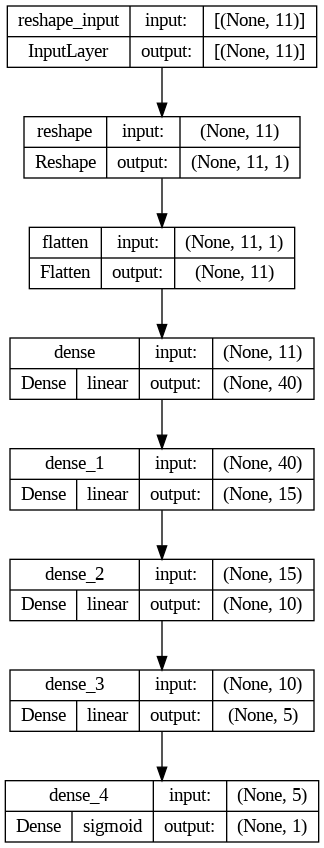

In [ ]:

def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(40, kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dense(15, kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dense(10, kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dense(5, kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
    ])

# RNN
# def create_keras_model():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
#         tf.keras.layers.SimpleRNN(32),
#         tf.keras.layers.Dense(85, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(60, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(25, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(10, kernel_initializer='zeros'),
#         tf.keras.layers.Softmax(),
#     ])
# def create_keras_model():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
#         tf.keras.layers.LSTM(32),
#         tf.keras.layers.Dense(85, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(60, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(25, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(10, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(32, kernel_initializer='lecun_normal',activation='selu'),
#     ])
# def create_keras_model():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
#         tf.keras.layers.GRU(32),
#         tf.keras.layers.Dense(30, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(25, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(1, kernel_initializer='zeros'),
#         tf.keras.layers.Softmax(),
#     ])

model=create_keras_model()
tf.keras.utils.plot_model(
model,
to_file="model_ann.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
    keras_model=keras_model,
    input_spec=preprocessed_example_dataset.element_spec,
    loss=tf.keras.losses.Poisson(reduction="auto", name="poisson"),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.FalseNegatives()
    ]
)

In [ ]:
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam())



In [ ]:
str(iterative_process.initialize.type_signature)

'( -> <global_model_weights=<trainable=<float32[11,40],float32[40],float32[40,15],float32[15],float32[15,10],float32[10],float32[10,5],float32[5],float32[5,1],float32[1]>,non_trainable=<>>,distributor=<>,client_work=<>,aggregator=<value_sum_process=<>,weight_sum_process=<>>,finalizer=<int64,float32[11,40],float32[11,40],float32[40],float32[40],float32[40,15],float32[40,15],float32[15],float32[15],float32[15,10],float32[15,10],float32[10],float32[10],float32[10,5],float32[10,5],float32[5],float32[5],float32[5,1],float32[5,1],float32[1],float32[1]>>@SERVER)'

In [ ]:
state = iterative_process.initialize()

In [ ]:
df.dtypes

A                    float64
delta                float64
TM                   float64
DELTA_TM             float64
Electronégativité    float64
Delta_Electro-       float64
SID                  float64
VEC                  float64
Delta VEC            float64
K                    float64
Delta K              float64
Etat d'entropie        int64
id                     int64
dtype: object

In [ ]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.41963226), ('true_positives', 17031.0), ('true_negatives', 8207.0), ('false_positives', 5943.0), ('false_negatives', 2539.0), ('loss', 0.80964416), ('num_examples', 33720), ('num_batches', 33720)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])


In [ ]:
NUM_ROUNDS = 100

acc = []
for round_num in range(2, NUM_ROUNDS):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))
    acc.append( metrics['client_work']['train'])

round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.41963226), ('true_positives', 17053.0), ('true_negatives', 8160.0), ('false_positives', 5990.0), ('false_negatives', 2517.0), ('loss', 0.8099781), ('num_examples', 33720), ('num_batches', 33720)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  3, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.41963226), ('true_positives', 17036.0), ('true_negatives', 8262.0), ('false_positives', 5888.0), ('false_negatives', 2534.0), ('loss', 0.8095931), ('num_examples', 33720), ('num_batches', 33720)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  4, metrics=OrderedDict([('distributor', ()), ('client_w

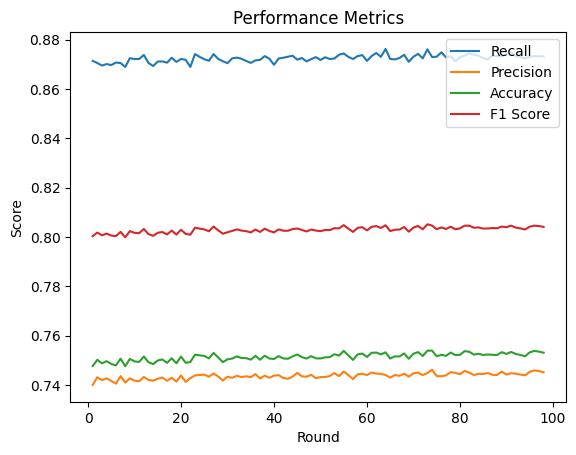

In [ ]:
from matplotlib.animation import FuncAnimation

tp_values = [int(i['true_positives']) for i in acc]  # List of true positives values for each round
tn_values = [int(i['true_negatives']) for i in acc]  # List of true negatives values for each round
fp_values = [int(i['false_positives']) for i in acc]  # List of false positives values for each round
fn_values = [int(i['false_negatives']) for i in acc]

accuracy_values = [(tp + tn) / (tp + tn + fp + fn) for tp, tn, fp, fn in zip(tp_values, tn_values, fp_values, fn_values)]
recall_values = [tp / (tp + fn) if (tp + fn) > 0 else 0 for tp, fn in zip(tp_values, fn_values)]
f1_score_values = [tp/(tp+0.5*(fp+fn))  for tp, fp, fn in zip(tp_values, fp_values, fn_values)]

# Create x-axis values
rounds = np.arange(1, len(tp_values) + 1)
precision_values= [tp  / (tp +fp ) for tp,  fp in zip(tp_values,  fp_values)]
# Plot recall
plt.plot(rounds, recall_values, label='Recall')
plt.plot(rounds, precision_values, label='Precision')

# Plot accuracy
plt.plot(rounds, accuracy_values, label='Accuracy')

# Plot F1 score
plt.plot(rounds, f1_score_values, label='F1 Score')

# Set plot title and labels
plt.title('Performance Metrics')
plt.xlabel('Round')
plt.ylabel('Score')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Show the plot
plt.show()

Evaluation process

In [ ]:

# Create a model function

# Use this model function to create a training process
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

In [ ]:
print(evaluation_process.next.type_signature.formatted_representation())

(<
  state=<
    global_model_weights=<
      trainable=<
        float32[11,40],
        float32[40],
        float32[40,15],
        float32[15],
        float32[15,10],
        float32[10],
        float32[10,5],
        float32[5],
        float32[5,1],
        float32[1]
      >,
      non_trainable=<>
    >,
    distributor=<>,
    client_work=<
      <>,
      <
        sparse_categorical_accuracy=<
          float32,
          float32
        >,
        true_positives=<
          float32[1]
        >,
        true_negatives=<
          float32[1]
        >,
        false_positives=<
          float32[1]
        >,
        false_negatives=<
          float32[1]
        >,
        loss=<
          float32,
          float32
        >,
        num_examples=<
          int64
        >,
        num_batches=<
          int64
        >
      >
    >,
    aggregator=<
      value_sum_process=<>,
      weight_sum_process=<>
    >,
    finalizer=<>
  >@SERVER,
  client_data={<
    x=floa

In [ ]:
evaluation_state = evaluation_process.initialize()
model_weights = iterative_process.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
federated_test_data = make_federated_data(test_data, test_data.client_ids)

len(federated_test_data), federated_test_data[0]

(1,
 <_MapDataset element_spec=OrderedDict([('x', TensorSpec(shape=(1, 11), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(1, 1), dtype=tf.int32, name=None))])>)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, federated_test_data)

<ipython-input-46-a79d3e099da3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-46-a79d3e099da3>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


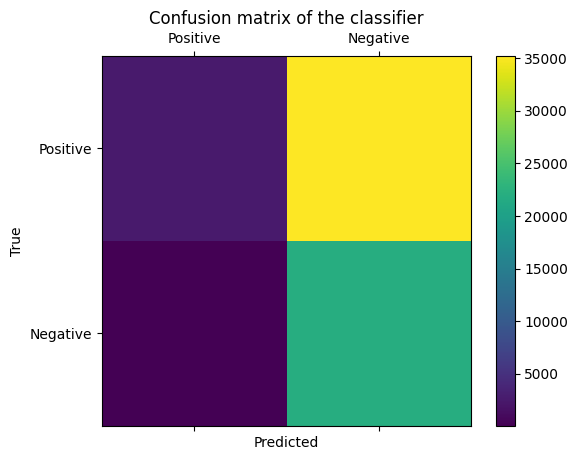

In [ ]:
tp = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['true_positives'])
tn = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['true_negatives'])
fp = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['false_positives'])
fn = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['false_negatives'])

cm = np.array([[tp, fp],
               [fn, tn]])

# labels
labels = ['Positive', 'Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)


table_html = """
<table>
  <tr>
    <th>Metric</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Precision</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>F1 Score</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>{:.2f}</td>
  </tr>
</table>
""".format(precision, recall, f1_score,accuracy)

# Display HTML table in Jupyter Notebook
from IPython.display import display, HTML
display(HTML(table_html))

Precision: 0.07024029574861368
Recall: 0.9672727272727273
F1 score: 0.1309699655342196


Metric,Value
Precision,0.07
Recall,0.97
F1 Score,0.13
Accuracy,0.41


In [ ]:
L=[]

Scenario repeated:

In [ ]:
# Run for Bigdata only
NUM_CLIENTS = 5

data = pd.read_csv("/content/drive/MyDrive/BigData.csv", sep=',', encoding='latin-1')

data.rename(columns={"ElectronÃ©gativitÃ©": "Electronégativité"}, inplace=True)
data.drop("Unnamed: 0", axis=1, inplace=True)
data=normalize_columns(data,['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])
group_proportions = data["Etat d'entropie"].value_counts(normalize=True)

# Step 2: Determine the size of the final dataset after sampling (let's say you want 70% of the original size)
desired_sample_size = 6000

# Step 3: Calculate the required sample size for each group based on their proportions
sample_size_group_0 = int(group_proportions.loc[0] * desired_sample_size)
sample_size_group_1 = int(group_proportions.loc[1] * desired_sample_size)

# Step 4: Separate the DataFrame into two groups based on the values of "Etat d'entropie"
grouped_data = data.groupby("Etat d'entropie")

# Step 5: Sample the rows from each group with the calculated sample sizes
sampled_data = grouped_data.apply(lambda x: x.sample(n=sample_size_group_0) if x["Etat d'entropie"].iloc[0] == 0 else x.sample(n=sample_size_group_1))

# Step 6: Concatenate the sampled groups back into a single DataFrame
sampled_data = sampled_data.reset_index(drop=True)

sampled_data["id"]=NUM_CLIENTS


# minority_count = data["Etat d'entropie"].sum()
# majority_count = data.shape[0] - minority_count

# # Calculate the difference in counts between the classes
# count_diff = majority_count - minority_count

# # If the difference is positive, we need to add more samples of the minority class (1)
# # If the difference is negative, we need to remove samples of the majority class (0)

# if count_diff > 0:
#     # Get the indices of the rows with target value 1
#     minority_indices = data[data['Etat d\'entropie'] == 1].index
#     # Sample rows with replacement from the minority class to match the majority class count
#     additional_minority_indices = np.random.choice(minority_indices, count_diff, replace=True)
#     # Concatenate the additional samples with the original DataFrame
#     data = pd.concat([data, data.loc[additional_minority_indices]])
# elif count_diff < 0:
#     # Get the indices of the rows with target value 0
#     majority_indices = data[data["Etat d'entropie"] == 0].index
#     # Randomly select rows from the majority class to remove to match the minority class count
#     majority_indices_to_remove = np.random.choice(majority_indices, abs(count_diff), replace=False)
#     # Drop the selected rows from the majority class
#     data = data.drop(majority_indices_to_remove)
df = pd.concat([df1, sampled_data], ignore_index=True)



In [ ]:
for id in range(1,NUM_CLIENTS+1):
  df[df["id"]==id].drop_duplicates(subset=['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])


# df=df.drop_duplicates(subset=['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])

In [ ]:
# split client id into train and test clients
client_id_colname = 'id' # the column that represents client ID
client_ids = df[client_id_colname].unique()
train_client_ids = range(1,NUM_CLIENTS)
test_client_ids = [NUM_CLIENTS]
print(client_ids)

[1 2 3 4 5]


In [ ]:
NUM_EPOCHS =10
BATCH_SIZE = 512
SHUFFLE_BUFFER = 2000
PREFETCH_BUFFER = 1000



train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=train_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

#
test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=test_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

In [ ]:
federated_test_data = make_federated_data(test_data, test_data.client_ids)

len(federated_test_data), federated_test_data[0]

(1,
 <_MapDataset element_spec=OrderedDict([('x', TensorSpec(shape=(1, 11), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(1, 1), dtype=tf.int32, name=None))])>)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, federated_test_data)

<ipython-input-55-a79d3e099da3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-55-a79d3e099da3>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


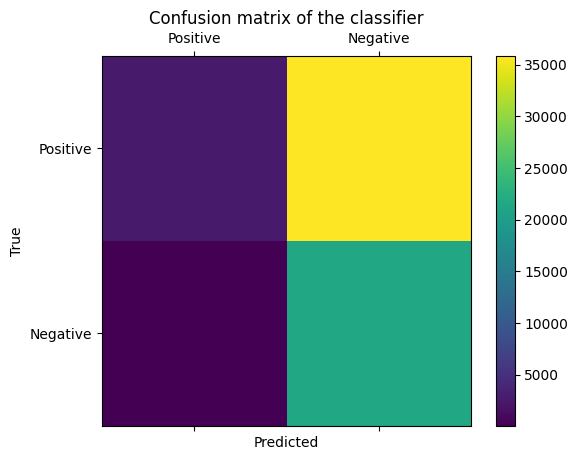

In [ ]:
tp = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['true_positives'])
tn = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['true_negatives'])
fp = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['false_positives'])
fn = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['false_negatives'])

cm = np.array([[tp, fp],
               [fn, tn]])

# labels
labels = ['Positive', 'Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)


table_html = """
<table>
  <tr>
    <th>Metric</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Precision</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>F1 Score</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>{:.2f}</td>
  </tr>
</table>
""".format(precision, recall, f1_score,accuracy)

# Display HTML table in Jupyter Notebook
from IPython.display import display, HTML
display(HTML(table_html))

Precision: 0.06977950713359274
Recall: 0.9781818181818182
F1 score: 0.13026634382566585


Metric,Value
Precision,0.07
Recall,0.98
F1 Score,0.13
Accuracy,0.40


In [ ]:
L.append([precision, recall, f1_score,accuracy])

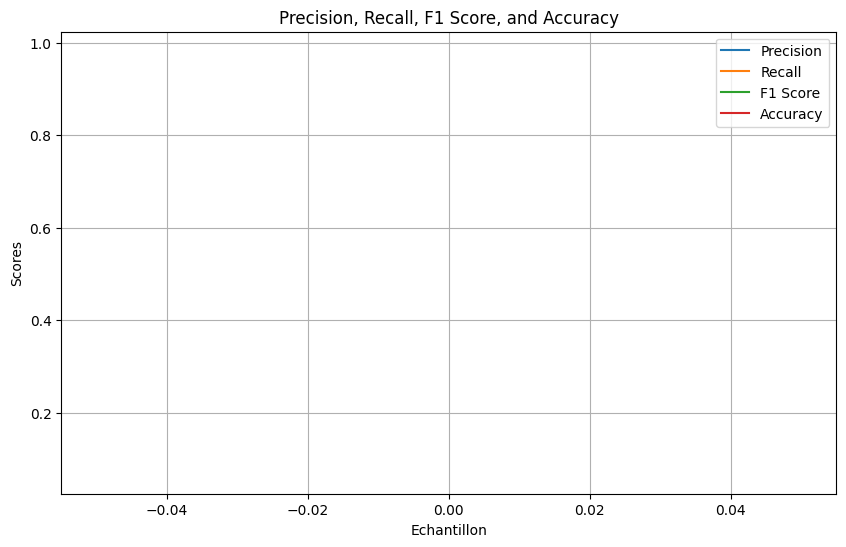

In [ ]:
legends = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

# Transpose the data to separate the metrics
metrics = list(zip(*L))

# Create the plot
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.plot(metric, label=legends[i])

plt.xlabel('Echantillon')
plt.ylabel('Scores')
plt.title('Precision, Recall, F1 Score, and Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1

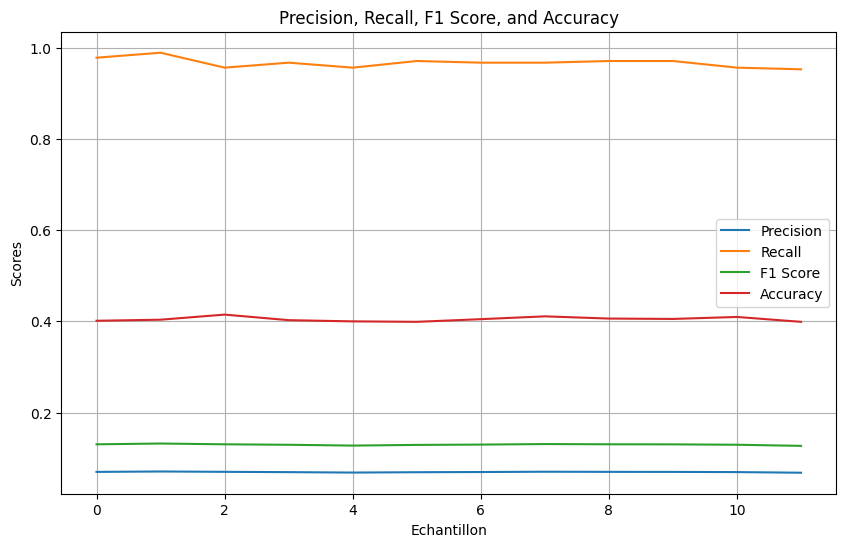

In [ ]:
while len(L)!=12:

  NUM_CLIENTS = 5

  data = pd.read_csv("/content/drive/MyDrive/BigData.csv", sep=',', encoding='latin-1')

  data.rename(columns={"ElectronÃ©gativitÃ©": "Electronégativité"}, inplace=True)
  data.drop("Unnamed: 0", axis=1, inplace=True)
  data=normalize_columns(data,['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])
  group_proportions = data["Etat d'entropie"].value_counts(normalize=True)

# Step 2: Determine the size of the final dataset after sampling (let's say you want 70% of the original size)
  desired_sample_size = 6000

# Step 3: Calculate the required sample size for each group based on their proportions
  sample_size_group_0 = int(group_proportions.loc[0] * desired_sample_size)
  sample_size_group_1 = int(group_proportions.loc[1] * desired_sample_size)

# Step 4: Separate the DataFrame into two groups based on the values of "Etat d'entropie"
  grouped_data = data.groupby("Etat d'entropie")

# Step 5: Sample the rows from each group with the calculated sample sizes
  sampled_data = grouped_data.apply(lambda x: x.sample(n=sample_size_group_0) if x["Etat d'entropie"].iloc[0] == 0 else x.sample(n=sample_size_group_1))

# Step 6: Concatenate the sampled groups back into a single DataFrame
  sampled_data = sampled_data.reset_index(drop=True)

  sampled_data["id"]=NUM_CLIENTS


# minority_count = data["Etat d'entropie"].sum()
# majority_count = data.shape[0] - minority_count

# # Calculate the difference in counts between the classes
# count_diff = majority_count - minority_count

# # If the difference is positive, we need to add more samples of the minority class (1)
# # If the difference is negative, we need to remove samples of the majority class (0)

# if count_diff > 0:
#     # Get the indices of the rows with target value 1
#     minority_indices = data[data['Etat d\'entropie'] == 1].index
#     # Sample rows with replacement from the minority class to match the majority class count
#     additional_minority_indices = np.random.choice(minority_indices, count_diff, replace=True)
#     # Concatenate the additional samples with the original DataFrame
#     data = pd.concat([data, data.loc[additional_minority_indices]])
# elif count_diff < 0:
#     # Get the indices of the rows with target value 0
#     majority_indices = data[data["Etat d'entropie"] == 0].index
#     # Randomly select rows from the majority class to remove to match the minority class count
#     majority_indices_to_remove = np.random.choice(majority_indices, abs(count_diff), replace=False)
#     # Drop the selected rows from the majority class
#     data = data.drop(majority_indices_to_remove)
  df = pd.concat([df1, sampled_data], ignore_index=True)

  for id in range(1,NUM_CLIENTS+1):

    df[df["id"]==id].drop_duplicates(subset=['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])
  # split client id into train and test clients
  client_id_colname = 'id' # the column that represents client ID
  client_ids = df[client_id_colname].unique()
  train_client_ids = range(1,NUM_CLIENTS)
  test_client_ids = [NUM_CLIENTS]

  NUM_EPOCHS =10
  BATCH_SIZE = 512
  SHUFFLE_BUFFER = 2000
  PREFETCH_BUFFER = 1000



  train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=train_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

#
  test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=test_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )
  federated_test_data = make_federated_data(test_data, test_data.client_ids)

  len(federated_test_data), federated_test_data[0]

  evaluation_output = evaluation_process.next(evaluation_state, federated_test_data)

# df=df.drop_duplicates(subset=['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])
  tp = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['true_positives'])
  tn = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['true_negatives'])
  fp = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['false_positives'])
  fn = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['false_negatives'])

  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  f1_score = 2 * (precision * recall) / (precision + recall)
  accuracy=(tp+tn)/(tp+tn+fp+fn)
  L.append([precision, recall, f1_score,accuracy])
legends = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

# Transpose the data to separate the metrics
metrics = list(zip(*L))

# Create the plot
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.plot(metric, label=legends[i])

plt.xlabel('Echantillon')
plt.ylabel('Scores')
plt.title('Precision, Recall, F1 Score, and Accuracy')
plt.legend()
plt.grid(True)
plt.show()
